In [18]:
from matplotlib import animation
from from_wave import *

save_path = "../plots"

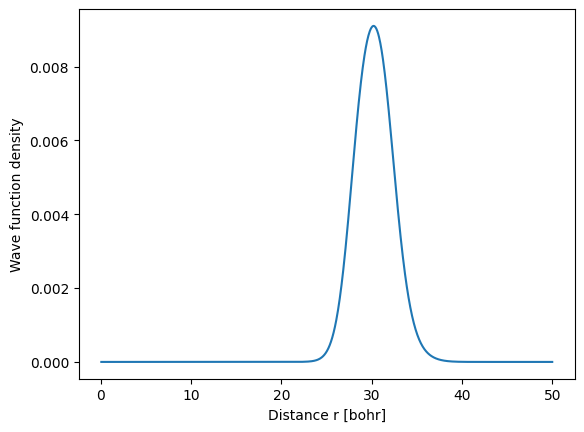

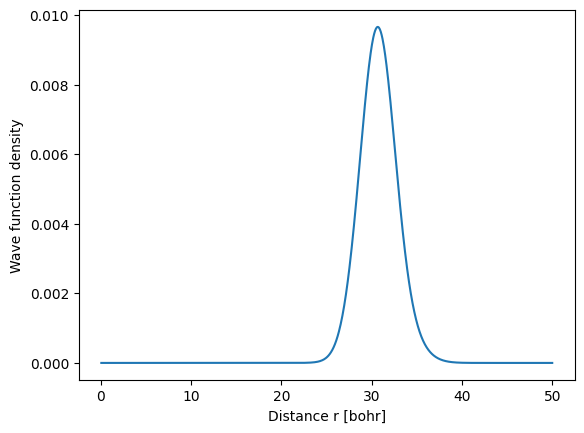

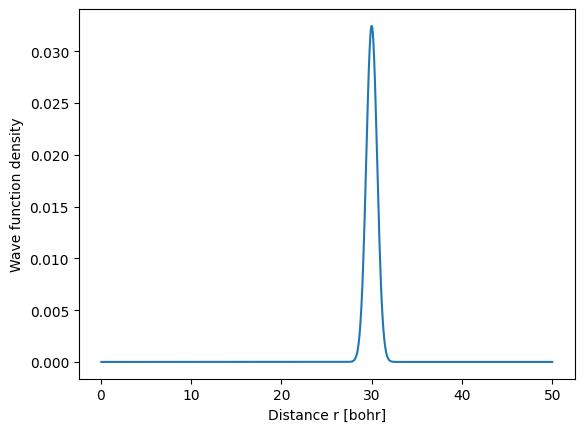

In [4]:
anim = distance_animation("coriolis_0_0")
anim.save(f'{save_path}/coriolis_0_0_distance_animation.gif', writer="pillow", fps=30)

anim = distance_animation("coriolis_1_0")
anim.save(f'{save_path}/coriolis_1_0_distance_animation.gif', writer="pillow", fps=30)

anim = distance_animation("coriolis_1_1")
anim.save(f'{save_path}/coriolis_1_1_distance_animation.gif', writer="pillow", fps=30)

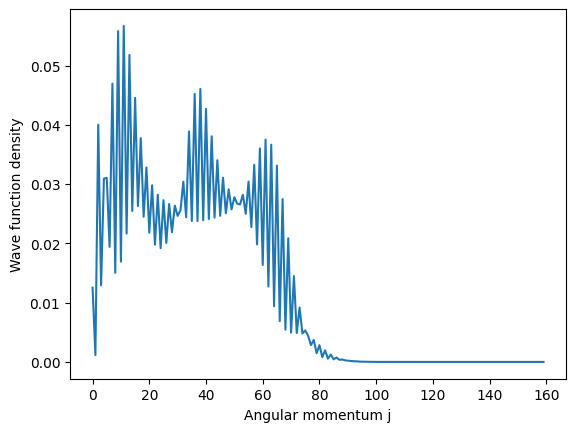

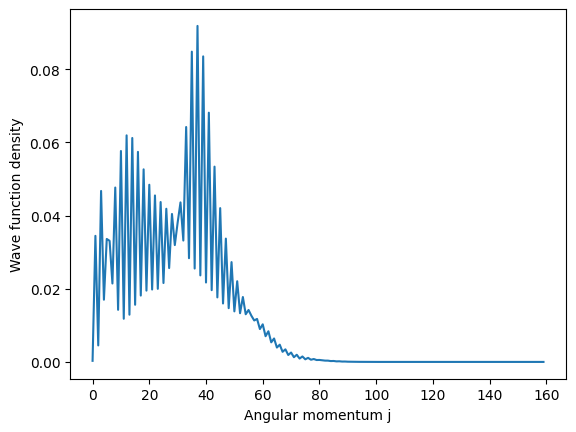

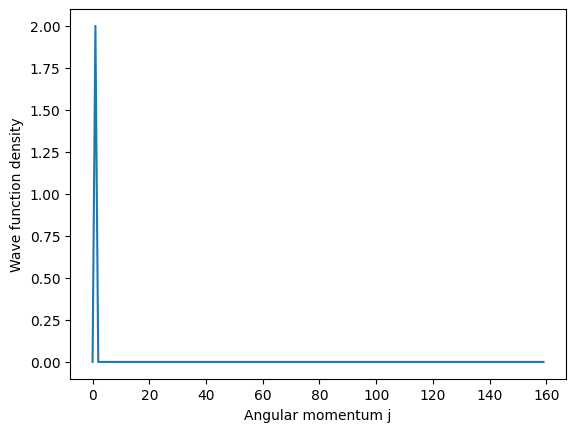

In [5]:
anim = angular_animation("coriolis_0_0")
anim.save(f'{save_path}/coriolis_0_0_angular_animation.gif', writer="pillow", fps=30)

anim = angular_animation("coriolis_1_0")
anim.save(f'{save_path}/coriolis_1_0_angular_animation.gif', writer="pillow", fps=30)

anim = angular_animation("coriolis_1_1")
anim.save(f'{save_path}/coriolis_1_1_angular_animation.gif', writer="pillow", fps=30)

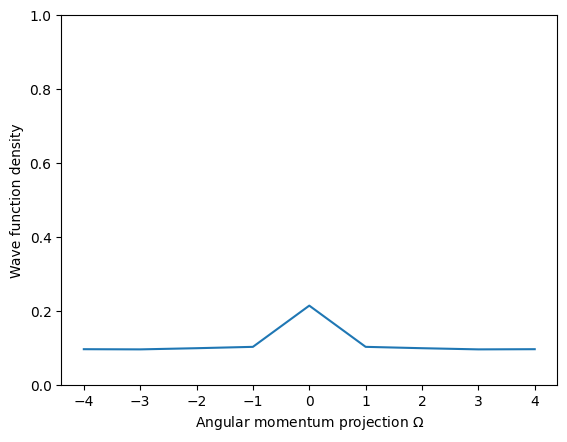

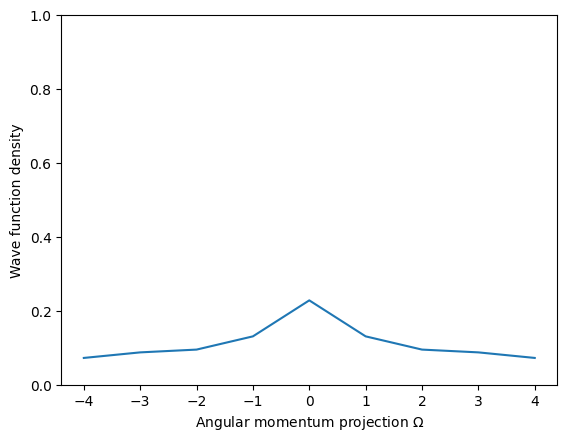

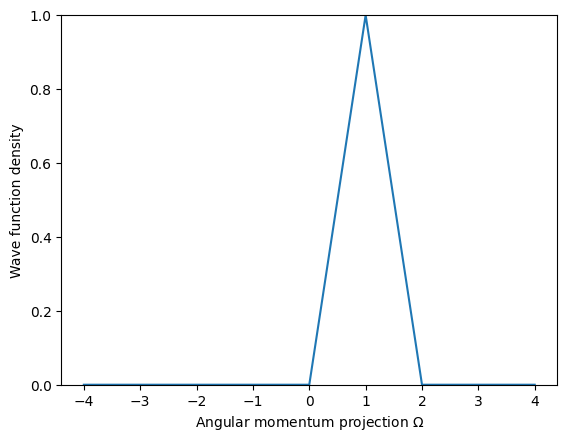

In [2]:
anim = omega_animation("coriolis_0_0")
anim.save(f'{save_path}/coriolis_0_0_omega_animation.gif', writer="pillow", fps=30)

anim = omega_animation("coriolis_1_0")
anim.save(f'{save_path}/coriolis_1_0_omega_animation.gif', writer="pillow", fps=30)

anim = omega_animation("coriolis_1_1")
anim.save(f'{save_path}/coriolis_1_1_omega_animation.gif', writer="pillow", fps=30)

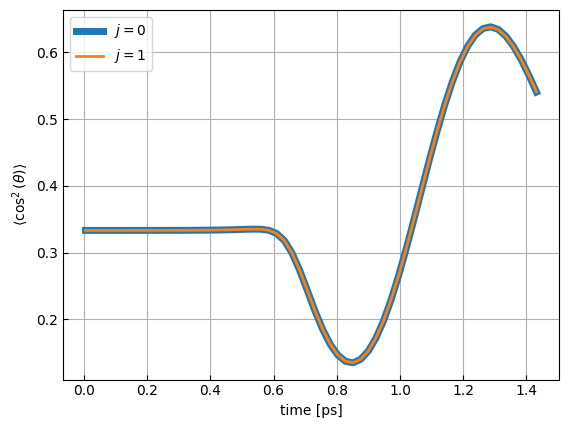

In [2]:
fig, ax = alignements("coriolis", [0, 1])
ax.lines[0].set_linewidth(5)
ax.lines[1].set_linewidth(2)
ax.legend()

pass

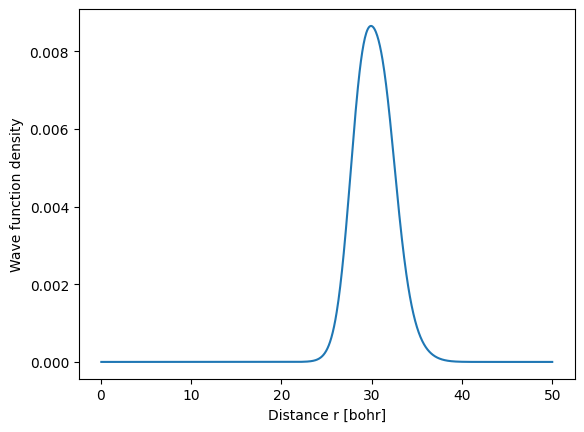

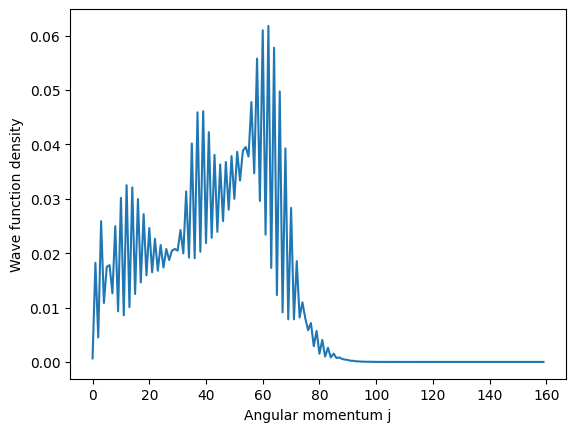

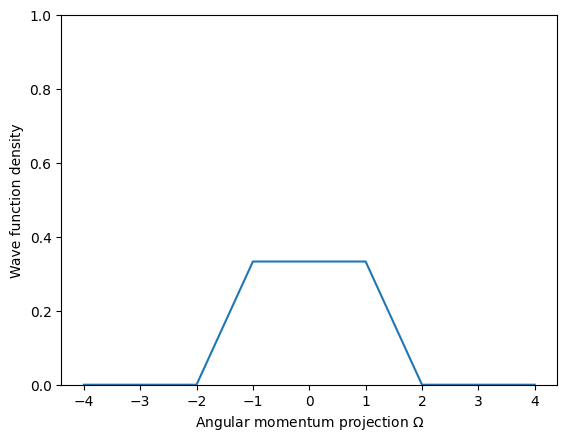

In [8]:
anim = distance_animation("coriolis_1")
anim.save(f'{save_path}/coriolis_1_distance_animation.gif', writer="pillow", fps=30)

anim = angular_animation("coriolis_1")
anim.save(f'{save_path}/coriolis_1_angular_animation.gif', writer="pillow", fps=30)

anim = omega_animation("coriolis_1")
anim.save(f'{save_path}/coriolis_1_omega_animation.gif', writer="pillow", fps=30)

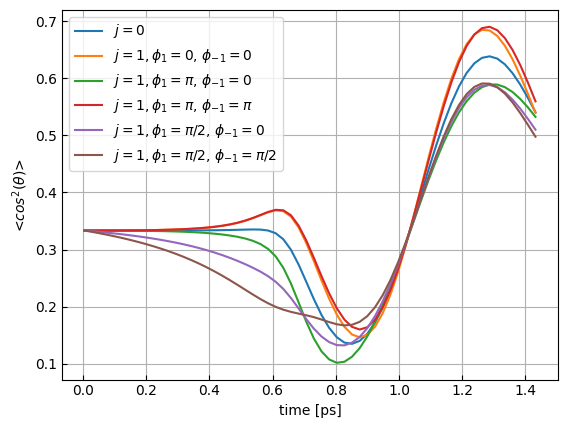

In [3]:
fig, ax = alignement_mixed_phases("coriolis", ["0_0", "pi_0", "pi_pi", "hpi_0", "hpi_hpi"])
ax.legend()

fig.savefig(f"{save_path}/coriolis_phases.pdf")

pass

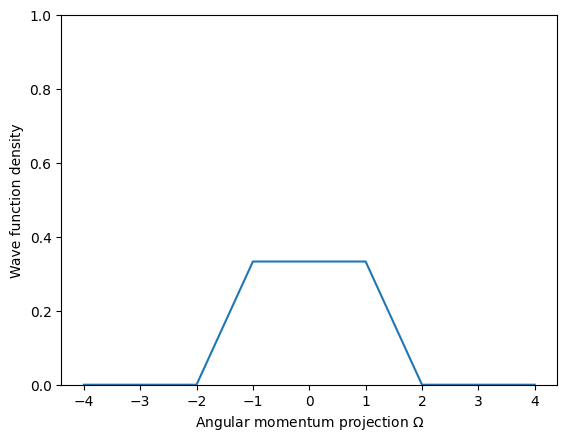

In [10]:
anim = omega_animation("coriolis_1_phase_hpi_hpi")
anim.save(f'{save_path}/coriolis_1_phase_animation.gif', writer="pillow", fps=30)

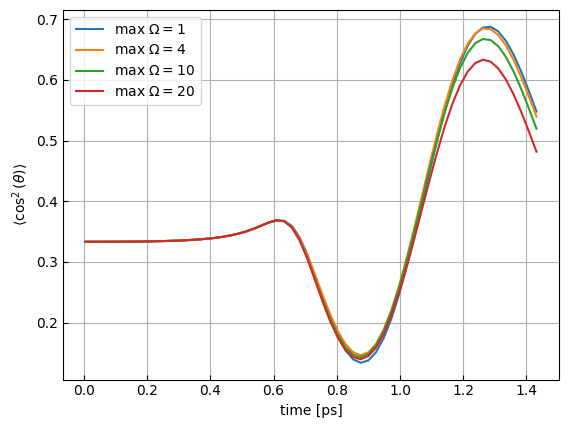

In [6]:
fig, ax = plt.subplots()
ax.grid()
ax.tick_params(which='both', direction="in")
ax.set_xlabel('time [ps]')
ax.set_ylabel('$\\left<\\cos^2(\\theta)\\right>$')

for omega_max in [1, 4, 10, 20]:
    time, alignment = alignment_from_wave(path, f"coriolis_1_phase_coriolis_omega_max_{omega_max}")
    ax.plot(time, alignment, label = f"max $\\Omega = {omega_max}$")
ax.legend()

fig.savefig(f"{save_path}/coriolis_phases_convergence.pdf")

pass

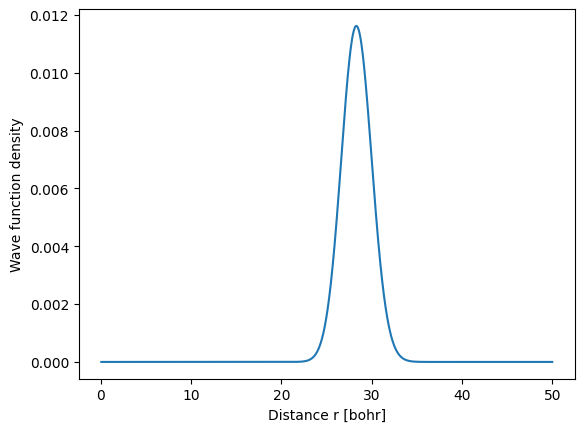

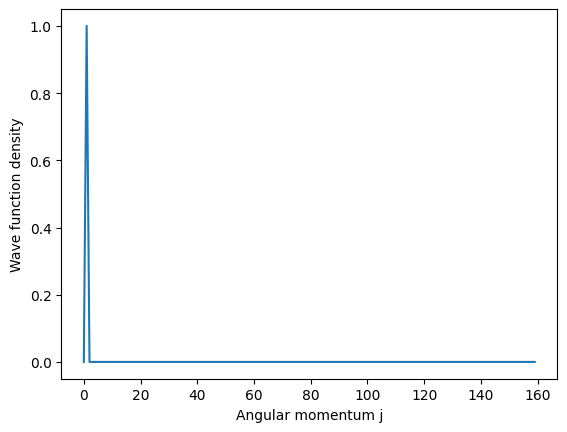

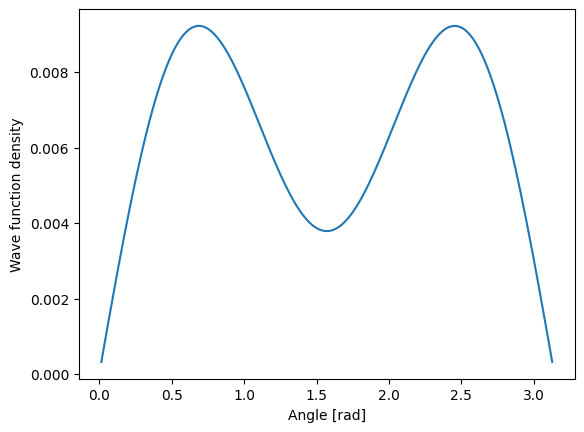

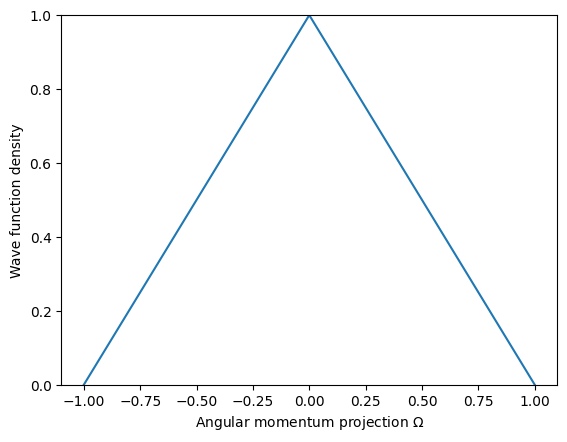

In [2]:
anim = distance_animation("free_coriolis")
anim.save(f'{save_path}/free_coriolis_distance_animation.gif', writer="pillow", fps=30)

anim = angular_animation("free_coriolis")
anim.save(f'{save_path}/free_coriolis_angular_animation.gif', writer="pillow", fps=30)

anim = polar_animation("free_coriolis")
anim.save(f'{save_path}/free_coriolis_polar_animation.gif', writer="pillow", fps=30)

anim = omega_animation("free_coriolis")
anim.save(f'{save_path}/free_coriolis_omega_animation.gif', writer="pillow", fps=30)

In [19]:
from from_result import *
mass = 27535.24841189485
energy_kelvin = 3700
energy = energy_kelvin * 3.1668105e-6

pass

In [21]:
j_init = 0

losses = read_losses(f"{path}/coriolis_losses_omega_max_8_{j_init}_0.dat")
Js = losses[1:, 0]
BSigma_losses = losses[1:, 1]
XPi_losses = losses[1:, 2]

xpi_part_cross_sect = calc_partial_cross_sections(mass, energy, j_init, 0, Js, XPi_losses)
xpi_cross_sect = calc_cross_section(Js, xpi_part_cross_sect)
xpi_react_rate = calc_reaction_rate(mass, energy, xpi_cross_sect)

bsigma_part_cross_sect = calc_partial_cross_sections(mass, energy, j_init, 0, Js, BSigma_losses)
bsigma_cross_sect = calc_cross_section(Js, bsigma_part_cross_sect)
bsigma_react_rate = calc_reaction_rate(mass, energy, bsigma_cross_sect)

xpi_react_rate_0 = xpi_react_rate
bsigma_react_rate_0 = bsigma_react_rate

print("XPi reaction rate: ", xpi_react_rate_0)
print("A + B reaction rate: ", bsigma_react_rate_0)

XPi reaction rate:  2.4558966930855053e-10
A + B reaction rate:  6.09988669825914e-10


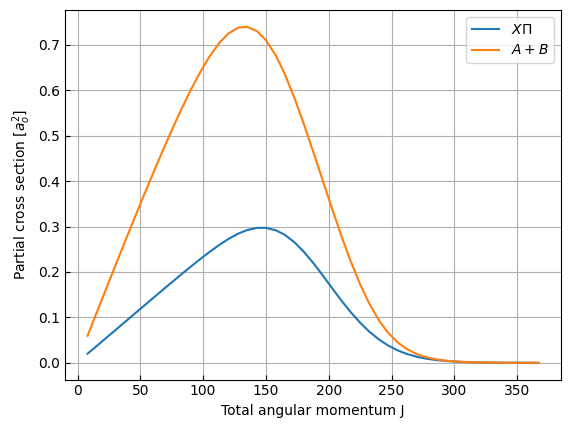

In [22]:
fig, ax = utility.plot()

ax.plot(Js, xpi_part_cross_sect, label=r"$X \Pi$")
ax.plot(Js, bsigma_part_cross_sect, label="$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend()

pass

In [23]:
j_init = 1

losses = read_losses(f"{path}/coriolis_losses_omega_max_8_{j_init}.dat")
Js = losses[:, 0]
BSigma_losses = losses[:, 1]
XPi_losses = losses[:, 2]

xpi_part_cross_sect = calc_partial_cross_sections(mass, energy, j_init, 2 * j_init, Js, XPi_losses)
xpi_cross_sect = calc_cross_section(Js, xpi_part_cross_sect)
xpi_react_rate = calc_reaction_rate(mass, energy, xpi_cross_sect)

bsigma_part_cross_sect = calc_partial_cross_sections(mass, energy, j_init, 2 * j_init, Js, BSigma_losses)
bsigma_cross_sect = calc_cross_section(Js, bsigma_part_cross_sect)
bsigma_react_rate = calc_reaction_rate(mass, energy, bsigma_cross_sect)

xpi_react_rate_1 = xpi_react_rate
bsigma_react_rate_1 = bsigma_react_rate

print("XPi reaction rate: ", xpi_react_rate_1)
print("A + B reaction rate: ", bsigma_react_rate_1)

XPi reaction rate:  2.545998562030193e-10
A + B reaction rate:  6.673601984288302e-10


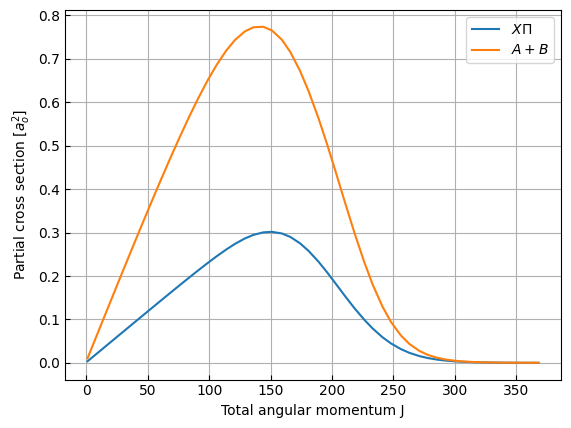

In [24]:
fig, ax = utility.plot()

ax.plot(Js, xpi_part_cross_sect, label=r"$X \Pi$")
ax.plot(Js, bsigma_part_cross_sect, label="$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend()

pass

In [25]:
print(f"Total reaction rate for j=0:")
print(f"xpi: {xpi_react_rate_0}")
print(f"A+B: {bsigma_react_rate_0}")
print()
print(f"Total reaction rate for j=1:")
print(f"xpi: {xpi_react_rate_1}")
print(f"A+B: {bsigma_react_rate_1}")
print()
print(f"Ratios j=1 to j=0:")
print(f"xpi: {xpi_react_rate_1/xpi_react_rate_0}")
print(f"A+B: {bsigma_react_rate_1/bsigma_react_rate_0}")

Total reaction rate for j=0:
xpi: 2.4558966930855053e-10
A+B: 6.09988669825914e-10

Total reaction rate for j=1:
xpi: 2.545998562030193e-10
A+B: 6.673601984288302e-10

Ratios j=1 to j=0:
xpi: 1.0366879719323563
A+B: 1.0940534331880125


In [26]:
j_init = 1
omega_init = 0

losses = read_losses(f"{path}/coriolis_losses_omega_max_8_{j_init}_{omega_init}.dat")
Js = losses[:, 0]
BSigma_losses = losses[:, 1]
XPi_losses = losses[:, 2]

xpi_part_cross_sect = calc_partial_cross_sections(mass, energy, j_init, omega_init, Js, XPi_losses)
xpi_cross_sect = calc_cross_section(Js, xpi_part_cross_sect)
xpi_react_rate = calc_reaction_rate(mass, energy, xpi_cross_sect)

bsigma_part_cross_sect = calc_partial_cross_sections(mass, energy, j_init, omega_init, Js, BSigma_losses)
bsigma_cross_sect = calc_cross_section(Js, bsigma_part_cross_sect)
bsigma_react_rate = calc_reaction_rate(mass, energy, bsigma_cross_sect)

xpi_react_rate_10 = xpi_react_rate
bsigma_react_rate_10 = bsigma_react_rate

print("XPi reaction rate: ", xpi_react_rate_10)
print("A + B reaction rate: ", bsigma_react_rate_10)

XPi reaction rate:  7.076745879453933e-11
A + B reaction rate:  1.8800190169372772e-10


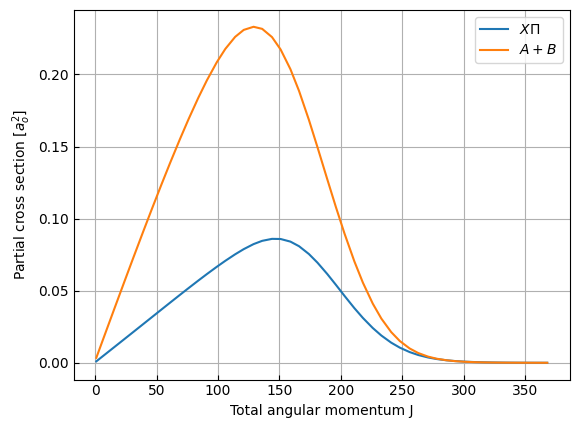

In [27]:
fig, ax = utility.plot()

ax.plot(Js, xpi_part_cross_sect, label=r"$X \Pi$")
ax.plot(Js, bsigma_part_cross_sect, label="$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend()

pass

In [28]:
j_init = 1
omega_init = 1

losses = read_losses(f"{path}/coriolis_losses_omega_max_8_{j_init}_{omega_init}.dat")
Js = losses[:, 0]
BSigma_losses = losses[:, 1]
XPi_losses = losses[:, 2]

xpi_part_cross_sect = calc_partial_cross_sections(mass, energy, j_init, omega_init, Js, XPi_losses)
xpi_cross_sect = calc_cross_section(Js, xpi_part_cross_sect)
xpi_react_rate = calc_reaction_rate(mass, energy, xpi_cross_sect)

bsigma_part_cross_sect = calc_partial_cross_sections(mass, energy, j_init, omega_init, Js, BSigma_losses)
bsigma_cross_sect = calc_cross_section(Js, bsigma_part_cross_sect)
bsigma_react_rate = calc_reaction_rate(mass, energy, bsigma_cross_sect)

xpi_react_rate_11 = xpi_react_rate
bsigma_react_rate_11 = bsigma_react_rate

print("XPi reaction rate: ", xpi_react_rate_11)
print("A + B reaction rate: ", bsigma_react_rate_11)

XPi reaction rate:  1.7529792447355694e-10
A + B reaction rate:  4.234079406048273e-10


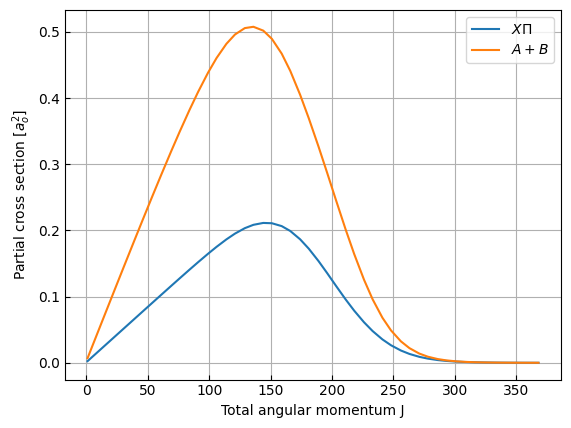

In [29]:
fig, ax = utility.plot()

ax.plot(Js, xpi_part_cross_sect, label=r"$X \Pi$")
ax.plot(Js, bsigma_part_cross_sect, label="$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend()

pass

In [30]:
xpi_react_rate0 = xpi_react_rate_0
bsigma_react_rate0 = bsigma_react_rate_0

xpi_react_rate1 = xpi_react_rate_10 + xpi_react_rate_11
bsigma_react_rate1 = bsigma_react_rate_10 + bsigma_react_rate_11

print(f"Total reaction rate for j=0:")
print(f"xpi: {xpi_react_rate0}")
print(f"A+B: {bsigma_react_rate0}")
print()
print(f"Total reaction rate for j=1:")
print(f"xpi: {xpi_react_rate1}")
print(f"A+B: {bsigma_react_rate1}")
print()
print(f"Ratios j=1 to j=0:")
print(f"xpi: {xpi_react_rate1/xpi_react_rate0}")
print(f"A+B: {bsigma_react_rate1/bsigma_react_rate0}")

Total reaction rate for j=0:
xpi: 2.4558966930855053e-10
A+B: 6.09988669825914e-10

Total reaction rate for j=1:
xpi: 2.4606538326809625e-10
A+B: 6.11409842298555e-10

Ratios j=1 to j=0:
xpi: 1.0019370275666932
A+B: 1.0023298342132265


[2.40573777e-10            nan            nan            nan
            nan] [7.45691906e-11 6.91113020e-11 7.11058819e-11 7.08091885e-11
 7.07674588e-11] [1.65780820e-10 1.73728436e-10 1.75939807e-10 1.75494447e-10
 1.75297924e-10] [5.90327022e-10            nan            nan            nan
            nan] [2.24194556e-10 1.86223454e-10 1.88859006e-10 1.88239128e-10
 1.88001902e-10] [3.66471437e-10 4.19978843e-10 4.25901004e-10 4.23975646e-10
 4.23407941e-10]


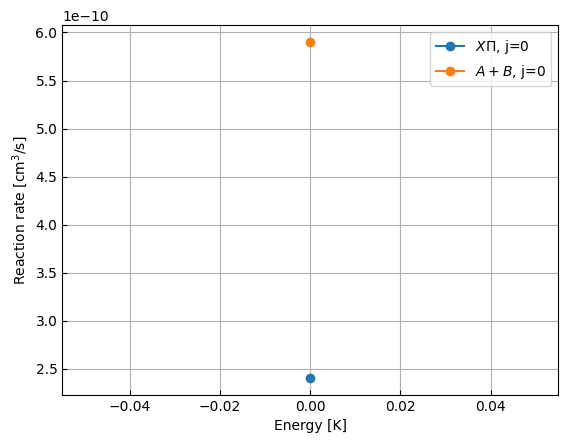

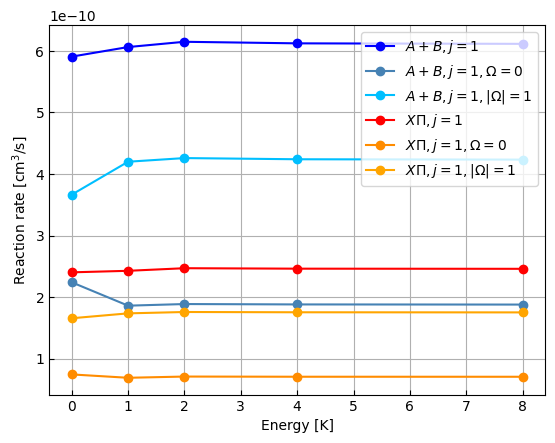

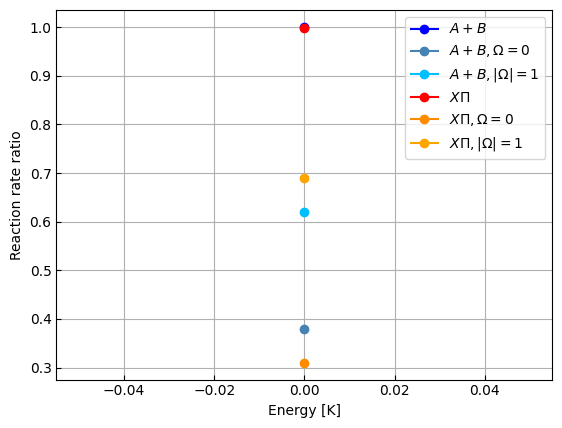

In [31]:
omega_maxes = [0, 1, 2, 4, 8]

xpi0, xpi10, xpi11, bsigma0, bsigma10, bsigma11 = get_reaction_rate_dependence("coriolis_losses_omega_max", omega_maxes, identity=0)

print(xpi0, xpi10, xpi11, bsigma0, bsigma10, bsigma11)

fig, ax = plot_reaction_rate_dependence_0("Energy [K]", omega_maxes, xpi0, bsigma0)
fig, ax = plot_reaction_rate_dependence_1("Energy [K]", omega_maxes, xpi10, xpi11, bsigma10, bsigma11)
fig, ax = plot_ratio_dependence("Energy [K]", omega_maxes, xpi0, xpi10, xpi11, bsigma0, bsigma10, bsigma11)